#Predicting Purchase Behavior(PB) based on Attitude(ATTD)

#Installing libraries

In [2]:
import math
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib
import seaborn as sns #visualization
import json
import pickle #saving the model
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from statistics import stdev
from warnings import simplefilter

import warnings
warnings.filterwarnings('ignore')


#Importing dataset

In [3]:
#reading the .xlsx dataset in to the dataframe
df1 = pd.read_excel("C:/Users/admin/Desktop/Predictive-Analysis/Baitaplon/Customer/Data/Data v1.0.xlsx")

In [4]:
df1.head()

,ID,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,1,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,2,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,3,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,4,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,5,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


# Exploratory Data Analysis (EDA)

In [5]:
#droping the column ID since it's not important
df2 = df1.drop(['ID'],axis=1)
df2.head()

,Gender,Age,Ethnic,Occupation,Annual Income,Social Media usage,Experience of purchasing due to social media influence,Reviews and rating impact on purchasing decision,Average time spent on the Internet (weekly),Attention to advertisement on social media,...,Attitude 3 (ATTD3),Attitude 4 (ATTD4),Social Norms 1 (SN1),Social Norms 2 (SN2),Social Norms 3 (SN3),Social Norms 4 (SN4),Perceived Behavioural Control 1 (PBC1),Perceived Behavioural Control 2 (PBC2),Perceived Behavioural Control 3 (PBC3),Perceived Behavioural Control 4 (PBC4)
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,Agree,Neutral,Strongly disagree,Disagree,Agree,Neutral,Neutral,Agree,Disagree,Disagree
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,Strongly disagree,Disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,Agree,Neutral,Neutral,Neutral,Agree,Agree,Neutral,Agree,Neutral,Agree
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,Agree,Agree,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Agree,Agree


In [6]:
df2.rename(columns={'Annual Income': 'Annual_Income',
                   'Social Media usage': 'Social_Media_usage',
                   'Experience of purchasing due to social media influence': 'Experience',
                   'Reviews and rating impact on purchasing decision': 'Reviews_and_rating',
                   'Average time spent on the Internet (weekly)': 'ATI',
                   'Attention to advertisement on social media': 'ADSM',
                   'Purchase Behaviour 1 (PB1)': 'PB1',
                   'Purchase Behaviour 2 (PB2)': 'PB2',
                   'Purchase Behaviour 3 (PB3)': 'PB3',
                   'Purchase Behaviour 4 (PB4)': 'PB4',
                   'Attitude 1 (ATTD1)': 'ATTD1',
                   'Attitude 2 (ATTD2)': 'ATTD2',
                   'Attitude 3 (ATTD3)': 'ATTD3',
                   'Attitude 4 (ATTD4)': 'ATTD4',
                   'Social Norms 1 (SN1)': 'SN1',
                   'Social Norms 2 (SN2)': 'SN2',
                   'Social Norms 3 (SN3)': 'SN3',
                   'Social Norms 4 (SN4)': 'SN4',
                   'Perceived Behavioural Control 1 (PBC1)': 'PBC1',
                   'Perceived Behavioural Control 2 (PBC2)': 'PBC2',
                   'Perceived Behavioural Control 3 (PBC3)': 'PBC3',
                   'Perceived Behavioural Control 4 (PBC4)': 'PBC4',
                   },
          inplace=True, errors='raise')

# DATA PREPROCESSING

In [7]:
#replacing the categorical value of PB, ATTD, SN and PBC to numerical value
df2 = df2.replace('Strongly agree',5)
df2 = df2.replace('Agree',4)
df2 = df2.replace('Neutral',3)
df2 = df2.replace('Disagree',2)
df2 = df2.replace('Strongly disagree',1)

In [8]:
# Merging PB1, PB2, PB3, PB4 to PB
df2['PB'] = df2['PB1'] + df2['PB2']+ df2['PB3']+ df2['PB4']

In [9]:
#Diving the PB target attribute to two class High and Low,
#and Appending a new target attribute PB-inf
rating = []
for row in df2['PB']:
    if row<=12:
        rating.append('LOW')
    else:
        rating.append('HIGH')
df2['PB-inf'] = rating

In [10]:
df2.head()

,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,12,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,1,2,4,3,3,4,2,2,15,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,1,1,1,1,1,1,1,1,5,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,4,4,3,4,3,4,15,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,3,2,3,3,3,4,4,4,16,HIGH


In [11]:
#Droping  PB1,PB2,PB3,PB4,PB and keeping PB-inf instead
df3= df2.drop(columns = ['PB1','PB2','PB3','PB4','PB'], inplace = True)
print(df2.shape)
df2.head()

(219, 23)


,Gender,Age,Ethnic,Occupation,Annual_Income,Social_Media_usage,Experience,Reviews_and_rating,ATI,ADSM,...,ATTD4,SN1,SN2,SN3,SN4,PBC1,PBC2,PBC3,PBC4,PB-inf
0,Female,29 - 34 Years Old,Chinese,Homemaker,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,3,3,3,3,3,3,3,3,LOW
1,Male,23 - 28 Years Old,Chinese,Student,"RM50,001-RM70,000",Yes,Yes,Yes,More than 40 hours,Yes,...,3,1,2,4,3,3,4,2,2,HIGH
2,Female,29 - 34 Years Old,Chinese,Homemaker,"Less than RM30,000",Yes,Yes,Yes,5 hours – 10 hours,No,...,2,1,1,1,1,1,1,1,1,LOW
3,Male,35 - 40 Years Old,Malay,Businessman,"More than RM90,001",Yes,Yes,No,1 hour – 4 hours,Yes,...,3,3,3,4,4,3,4,3,4,HIGH
4,Female,23 - 28 Years Old,Chinese,Employee,"RM70,001-RM90,000",Yes,Yes,Yes,10 hours – 20 hours,No,...,4,3,2,3,3,3,4,4,4,HIGH


In [12]:
#According to Theory of Planned behaviour, in order to predict Purchase Behaviour-PB we only need find the relationship between ATTD, SN, PBC
#Hence Droping all the column except ATTD, SN, PBC to Predict PB
colsToDrop = ['Gender', 'Age', 'Ethnic','Occupation','Annual_Income','Social_Media_usage','Experience','Reviews_and_rating','ATI','ADSM', 'SN1','SN2','SN3','SN4','PBC1','PBC2','PBC3','PBC4']
df2.drop(columns = colsToDrop, inplace = True)
y = df2['PB-inf']
X = df2.drop(columns = 'PB-inf')

In [13]:
df2.head()

,ATTD1,ATTD2,ATTD3,ATTD4,PB-inf
0,3,3,3,3,LOW
1,4,3,4,3,HIGH
2,3,1,1,2,LOW
3,4,4,4,3,HIGH
4,3,4,4,4,HIGH


# Hold Out Validation

In [14]:
#Spliting Ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

# KNN Classifier

              precision    recall  f1-score   support

        HIGH       0.87      0.83      0.85        24
         LOW       0.81      0.85      0.83        20

    accuracy                           0.84        44
   macro avg       0.84      0.84      0.84        44
weighted avg       0.84      0.84      0.84        44

Train Accuracy:  0.9257142857142857
Test Accuracy:  0.8409090909090909


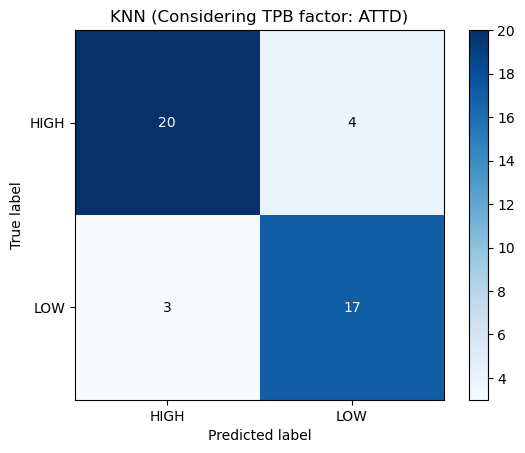

In [15]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # Minkowski Distance Metric and K = 5
knn_clf.fit(X_train, y_train)
y_pred = knn_clf.predict(X_test)

#Plotting confusion matrix for KNN
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "KNN (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy: ", accuracy_score(y_train, knn_clf.predict(X_train)))
print("Test Accuracy: ", accuracy_score(y_test, y_pred))

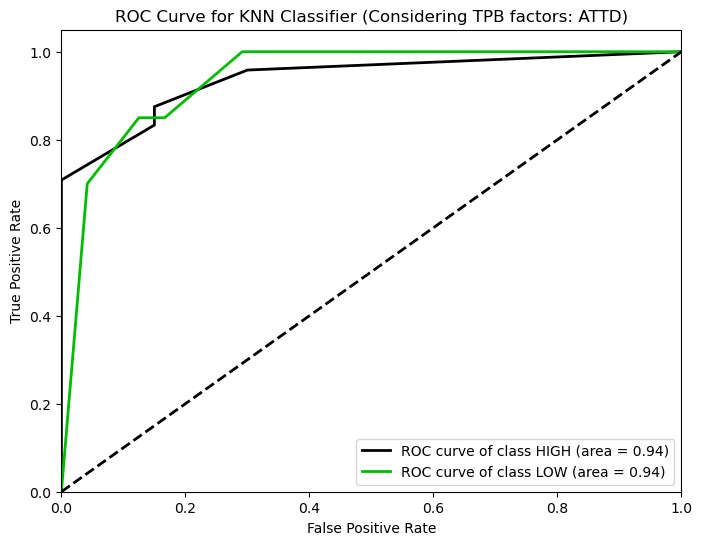

In [16]:
#plotting roc curve for KNN
y_probas = knn_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for KNN Classifier (Considering TPB factors: ATTD)");

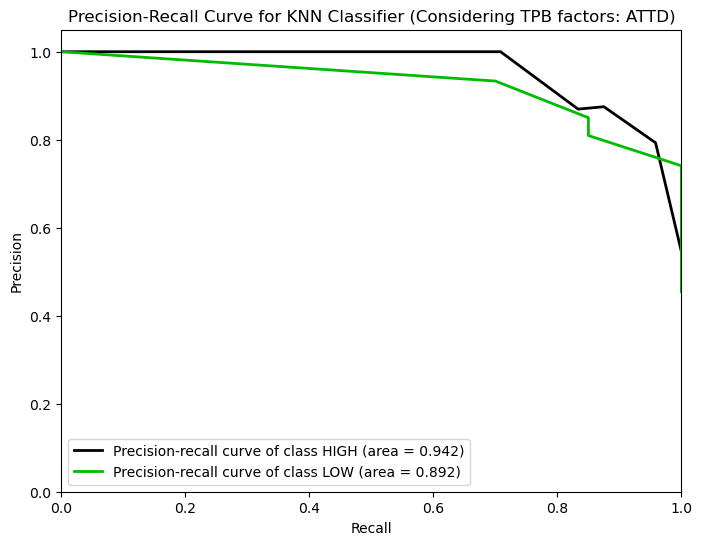

In [17]:
#plotting PRC curve for KNN
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for KNN Classifier (Considering TPB factors: ATTD)");

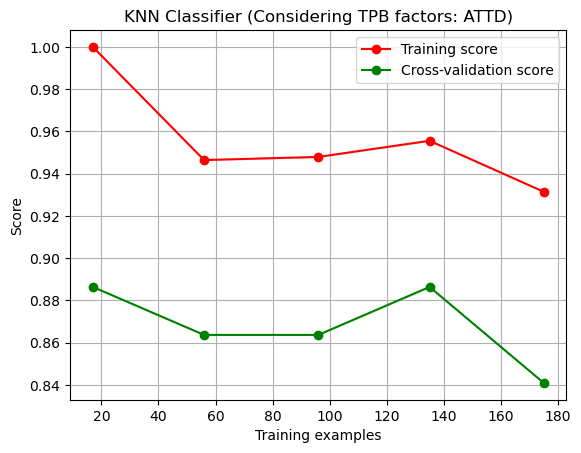

In [18]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(knn_clf, X, y, cv = cv,title = "KNN Classifier (Considering TPB factors: ATTD)");

# Decision Tree Classifier

              precision    recall  f1-score   support

        HIGH       0.83      0.83      0.83        24
         LOW       0.80      0.80      0.80        20

    accuracy                           0.82        44
   macro avg       0.82      0.82      0.82        44
weighted avg       0.82      0.82      0.82        44

Train Accuracy:  0.9314285714285714
Test Accuracy:  0.8181818181818182


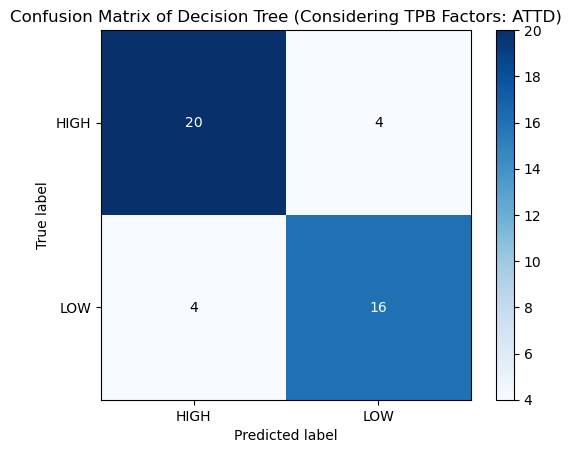

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 20)
tree_clf.fit(X_train, y_train)
train_prediction = tree_clf.predict(X_train)
test_prediction = tree_clf.predict(X_test)

#plotting confusion matrix for DT
skplt.metrics.plot_confusion_matrix(y_test, test_prediction, title = "Confusion Matrix of Decision Tree (Considering TPB Factors: ATTD)");
print(classification_report(y_test, test_prediction))
print("Train Accuracy: ", accuracy_score(y_train, train_prediction))
print("Test Accuracy: ", accuracy_score(y_test, test_prediction))

In [20]:
# def plot_learning_curves(model, X, y):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
#     train_errors, val_errors = [], []
#     for m in range(1, len(X_train) + 1):
#         model.fit(X_train[:m], y_train[:m])
#         y_train_predict = model.predict(X_train[:m])
#         y_val_predict = model.predict(X_val)
#         train_errors.append(accuracy_score(y_train[:m], y_train_predict))
#         val_errors.append(accuracy_score(y_val, y_val_predict))

#     plt.plot(train_errors, "r-+", linewidth=2, label="train")
#     plt.plot(val_errors, "b-", linewidth=3, label="val")
#     plt.legend(fontsize=14)
#     plt.xlabel("Training set size", fontsize=14) # not shown
#     plt.ylabel("Accuracy", fontsize=14)              # not shown

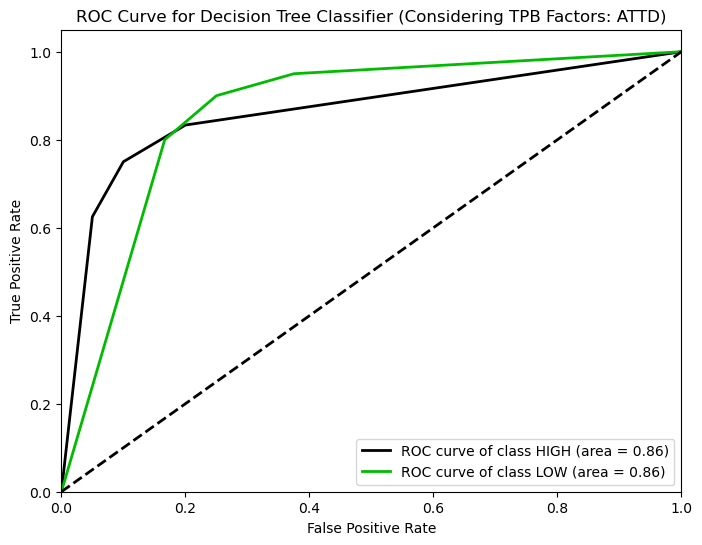

In [21]:
#plotting ROC curve for DT
y_probas = tree_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Decision Tree Classifier (Considering TPB Factors: ATTD)");

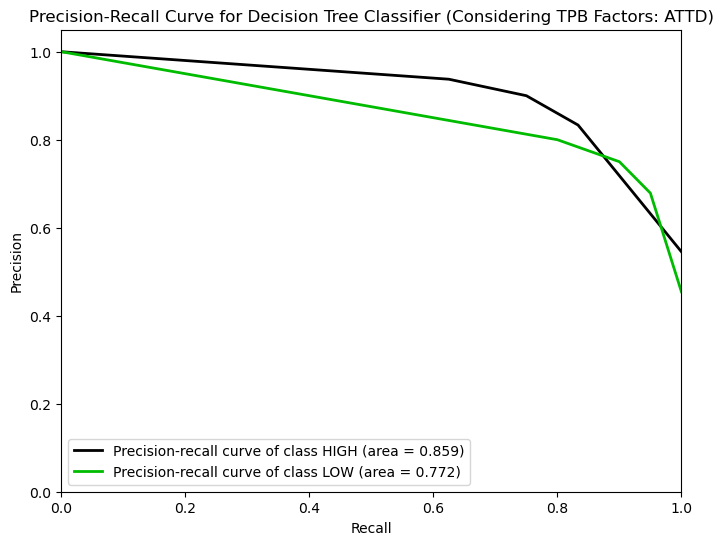

In [22]:
#Plotting PRC curve for DT
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Decision Tree Classifier (Considering TPB Factors: ATTD)");

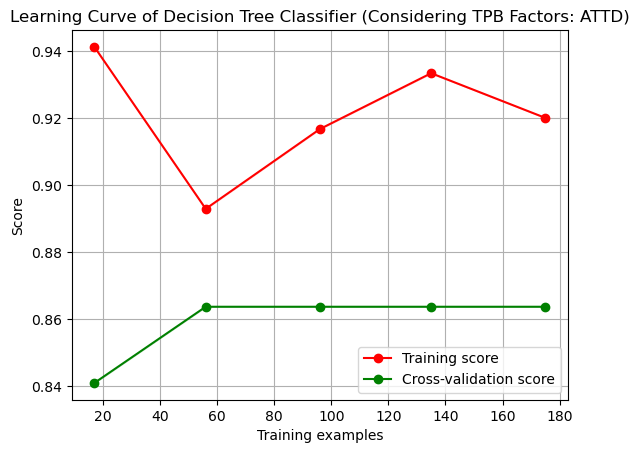

In [23]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(tree_clf, X, y, cv = cv,title = "Learning Curve of Decision Tree Classifier (Considering TPB Factors: ATTD)");

[Text(0.5, 0.8333333333333334, 'x[2] <= 3.5\ngini = 0.494\nsamples = 175\nvalue = [97, 78]'),
 Text(0.25, 0.5, 'x[3] <= 3.5\ngini = 0.283\nsamples = 88\nvalue = [15.0, 73.0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.123\nsamples = 76\nvalue = [5, 71]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(0.75, 0.5, 'x[0] <= 3.5\ngini = 0.108\nsamples = 87\nvalue = [82, 5]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.051\nsamples = 77\nvalue = [75, 2]')]

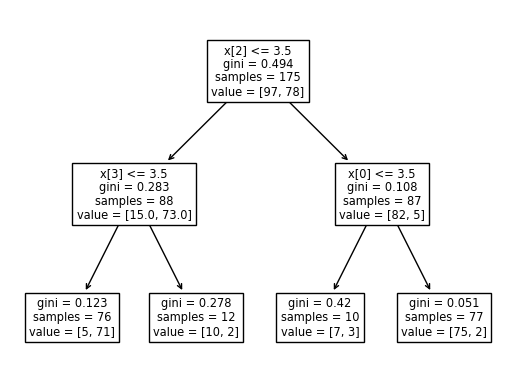

In [24]:
from sklearn import tree
tree.plot_tree(tree_clf)

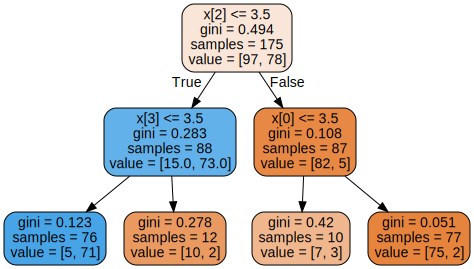

In [25]:
import graphviz
dot_data = tree.export_graphviz(tree_clf, out_file=None, filled = True, rounded = True, special_characters=False)
graph = graphviz.Source(dot_data)
graph

# Logistic Regression

              precision    recall  f1-score   support

        HIGH       0.90      0.79      0.84        24
         LOW       0.78      0.90      0.84        20

    accuracy                           0.84        44
   macro avg       0.84      0.85      0.84        44
weighted avg       0.85      0.84      0.84        44

Train Accuracy 0.9257142857142857
Test Accuracy 0.8409090909090909


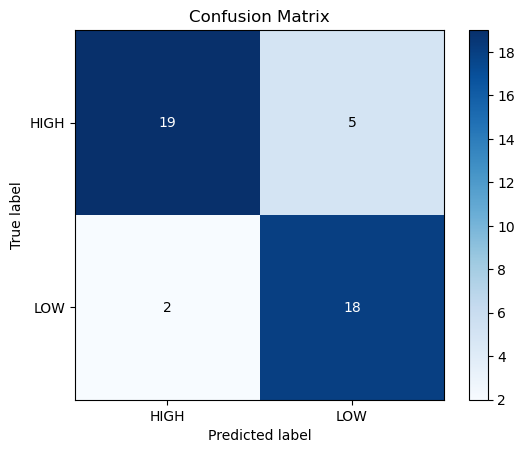

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

model = LogisticRegression(multi_class = 'ovr')
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, pred_test,);
print(classification_report(y_test, pred_test))
print("Train Accuracy", accuracy_score(y_train, pred_train))
print("Test Accuracy", accuracy_score(y_test, pred_test))

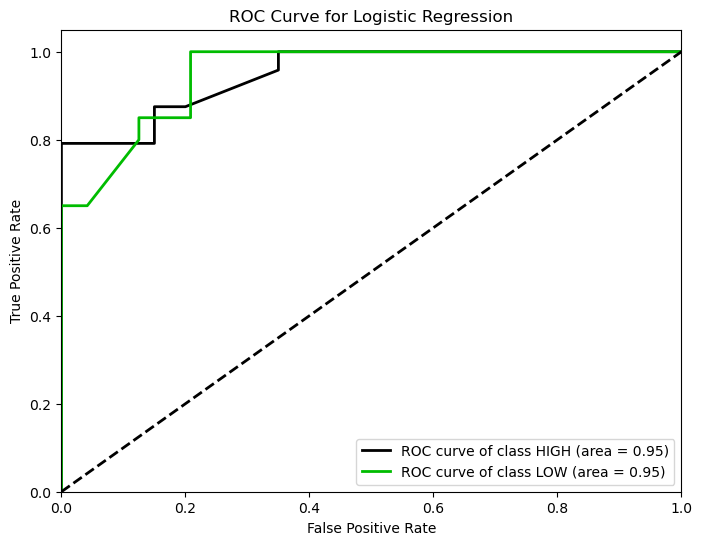

In [27]:
y_probas = model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Logistic Regression");

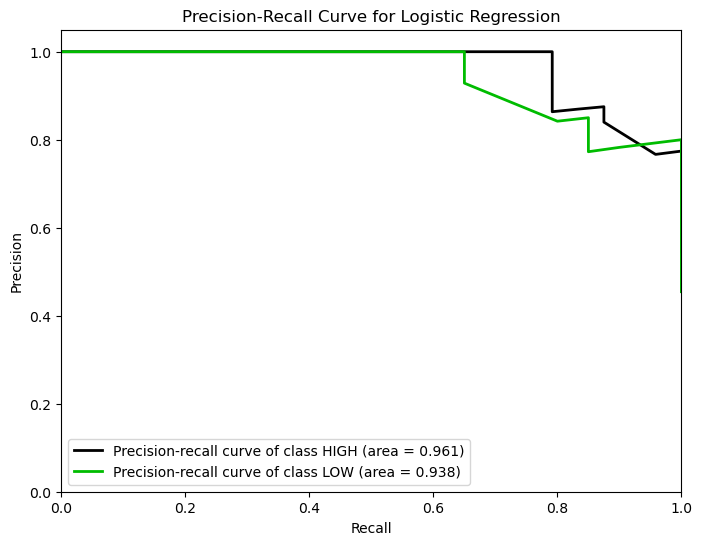

In [28]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Logistic Regression");

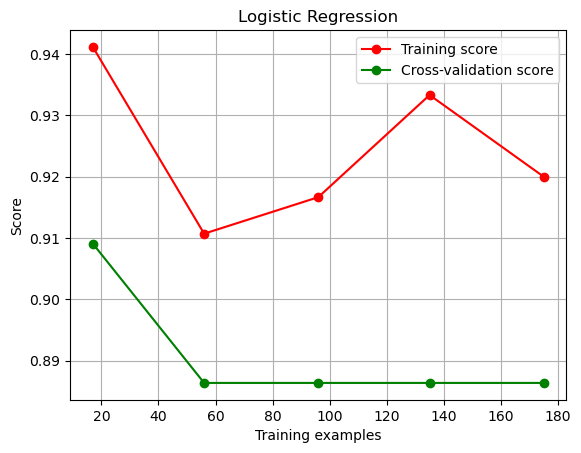

In [29]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(model, X, y, cv = cv,title = "Logistic Regression");

# Naive Bayes Classifier

              precision    recall  f1-score   support

        HIGH       0.90      0.79      0.84        24
         LOW       0.78      0.90      0.84        20

    accuracy                           0.84        44
   macro avg       0.84      0.85      0.84        44
weighted avg       0.85      0.84      0.84        44

Train Accuracy 0.9314285714285714
Test Accuracy 0.8409090909090909


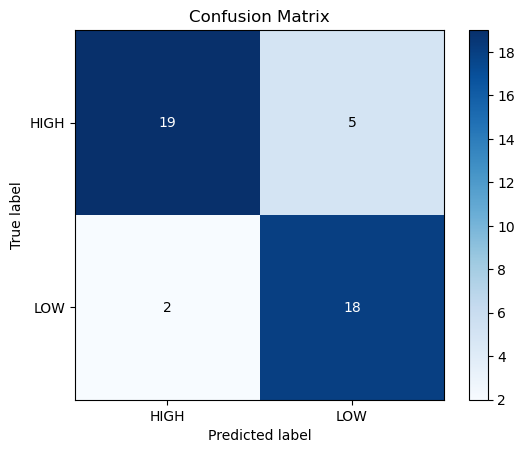

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

naive = GaussianNB()
naive.fit(X_train, y_train)
y_pred = naive.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(y_train, naive.predict(X_train)))
print("Test Accuracy", accuracy_score(y_test, naive.predict(X_test)))

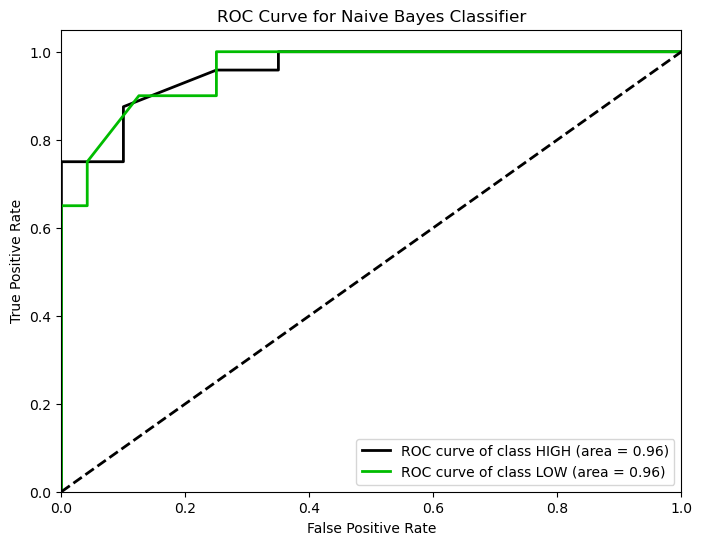

In [31]:
y_probas = naive.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Naive Bayes Classifier");

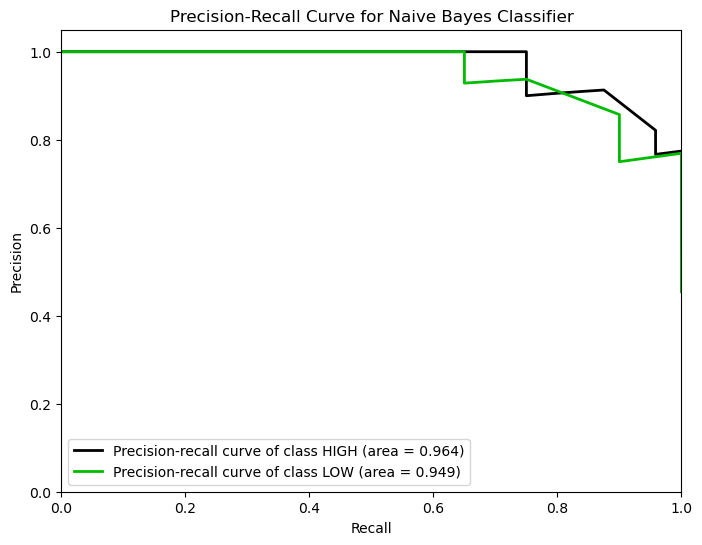

In [32]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Naive Bayes Classifier");

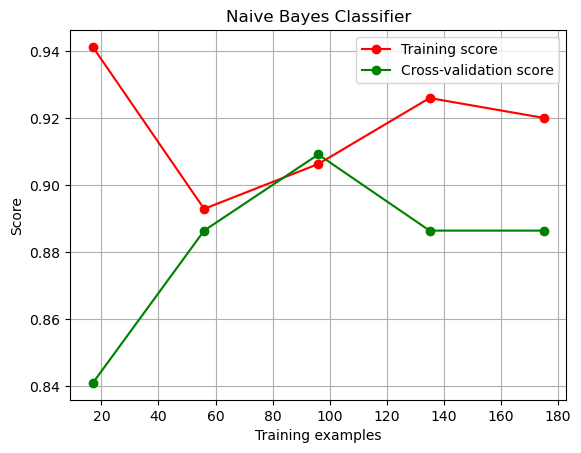

In [33]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(naive, X, y, cv = cv,
                      title = "Naive Bayes Classifier");

# Support Vector Machine (SVM) Classifier

              precision    recall  f1-score   support

        HIGH       0.91      0.83      0.87        24
         LOW       0.82      0.90      0.86        20

    accuracy                           0.86        44
   macro avg       0.86      0.87      0.86        44
weighted avg       0.87      0.86      0.86        44

Train Accuracy 0.9428571428571428
Test Accuracy 0.8636363636363636


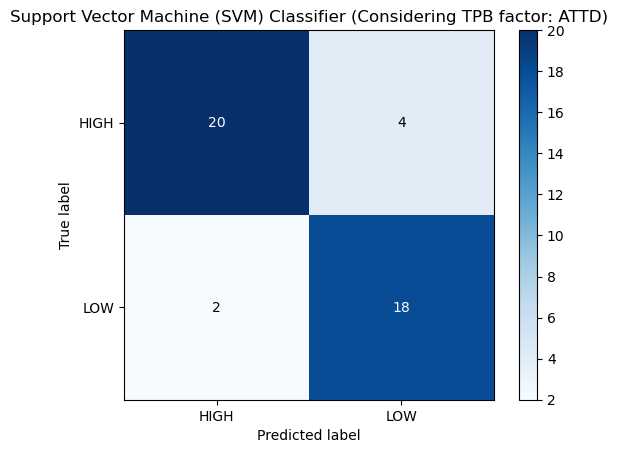

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

#plotting confusion matrix for SVM
skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(svm.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(svm.predict(X_test), y_test))

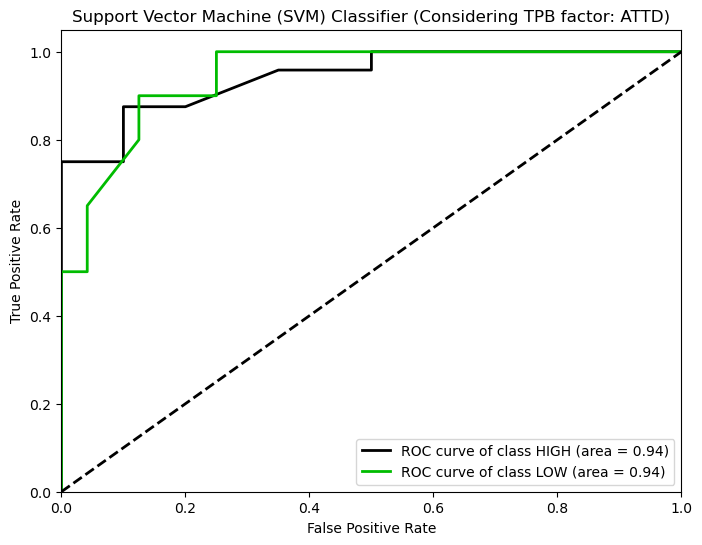

In [35]:
y_probas = svm.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

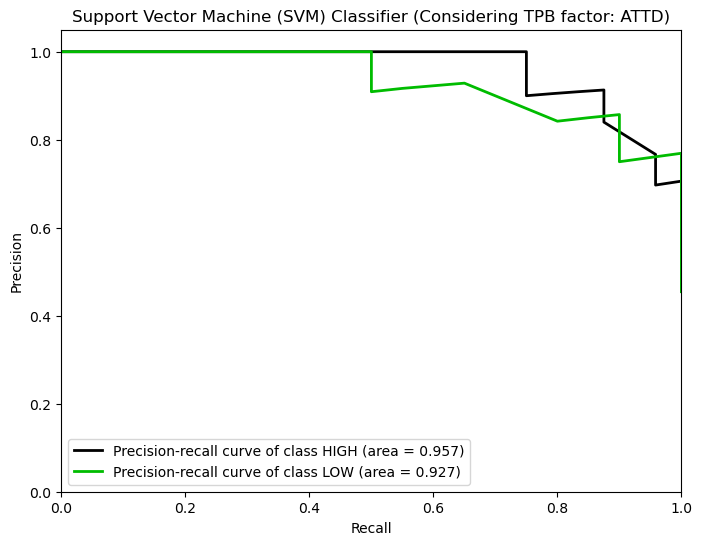

In [36]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

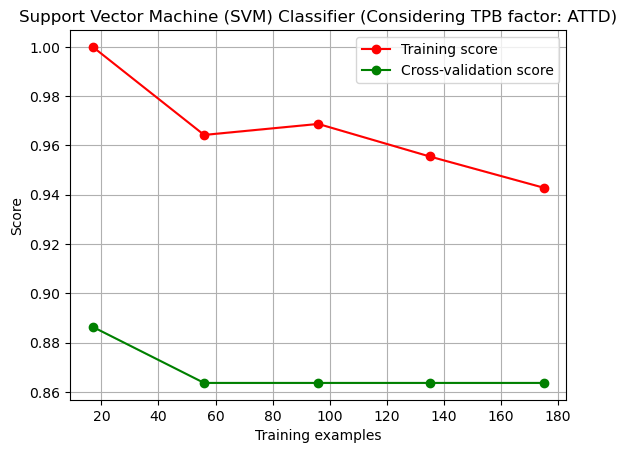

In [37]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(svm, X, y, cv = cv,
                      title = "Support Vector Machine (SVM) Classifier (Considering TPB factor: ATTD)");

# Ensemble Classifiers

## Random Forest Classifier

              precision    recall  f1-score   support

        HIGH       0.90      0.79      0.84        24
         LOW       0.78      0.90      0.84        20

    accuracy                           0.84        44
   macro avg       0.84      0.85      0.84        44
weighted avg       0.85      0.84      0.84        44

Train Accuracy 0.9542857142857143
Test Accuracy 0.8409090909090909


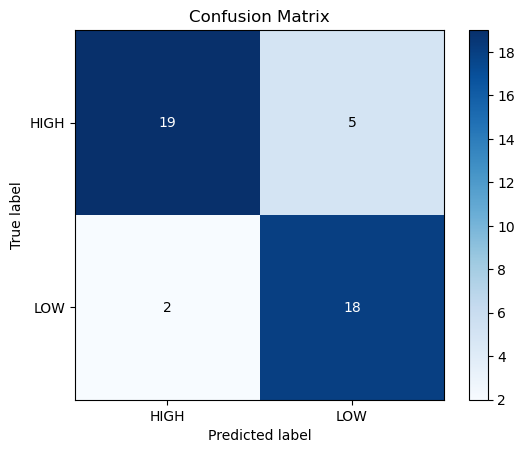

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred);
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(clf.predict(X_test), y_test))

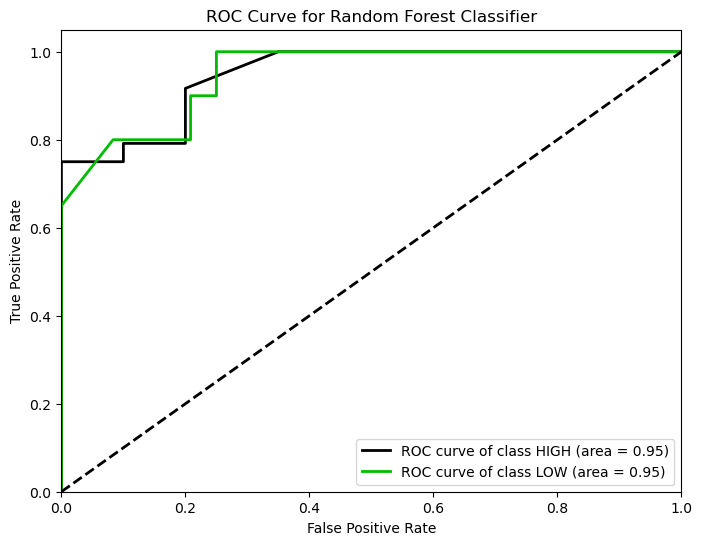

In [39]:
y_probas = clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "ROC Curve for Random Forest Classifier");

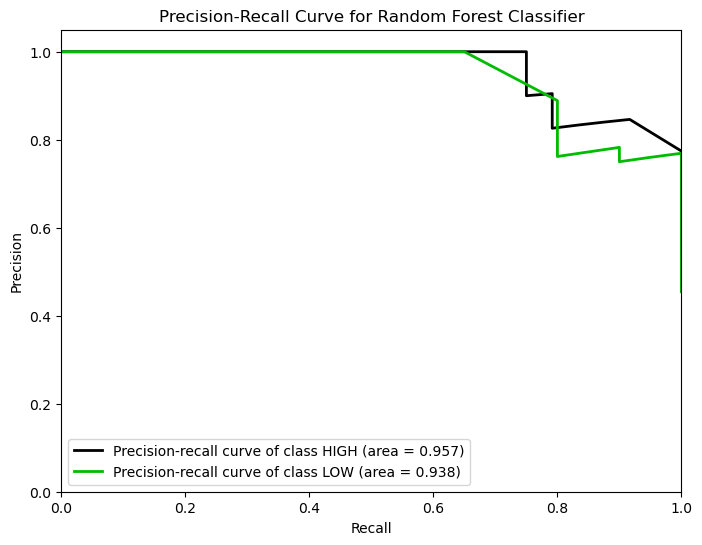

In [40]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "Precision-Recall Curve for Random Forest Classifier");

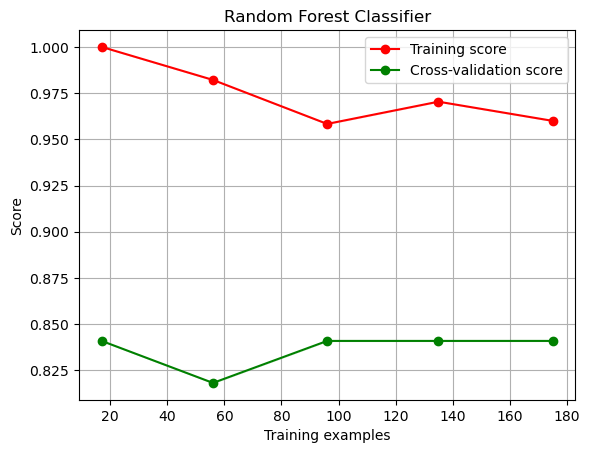

In [41]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
skplt.estimators.plot_learning_curve(clf, X, y, cv = cv,title = "Random Forest Classifier");

# AdaBoost Classifier

              precision    recall  f1-score   support

        HIGH       0.91      0.83      0.87        24
         LOW       0.82      0.90      0.86        20

    accuracy                           0.86        44
   macro avg       0.86      0.87      0.86        44
weighted avg       0.87      0.86      0.86        44

Train Accuracy 0.9314285714285714
Test Accuracy 0.8636363636363636


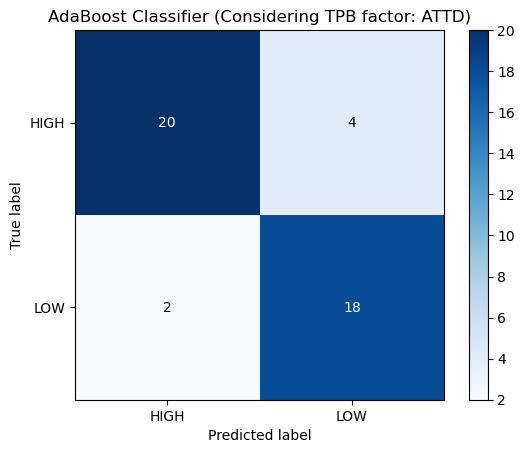

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
Ada_clf.fit(X_train, y_train)
y_pred = Ada_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "AdaBoost Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(Ada_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(Ada_clf.predict(X_test), y_test))

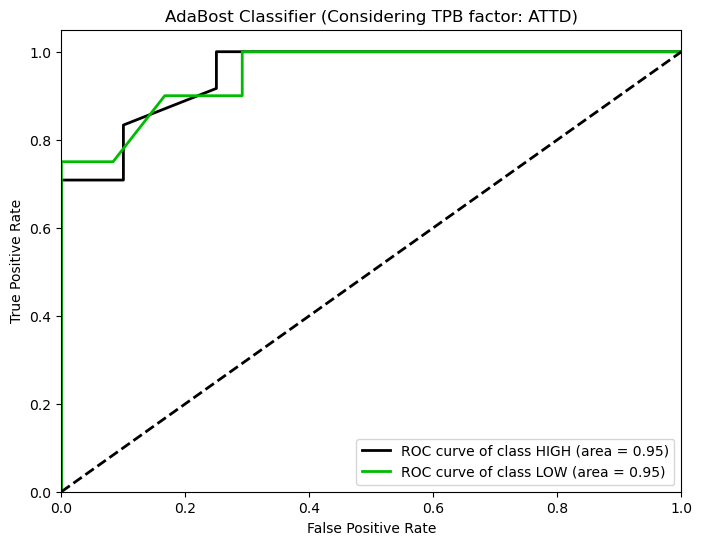

In [43]:
y_probas = Ada_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "AdaBost Classifier (Considering TPB factor: ATTD)");

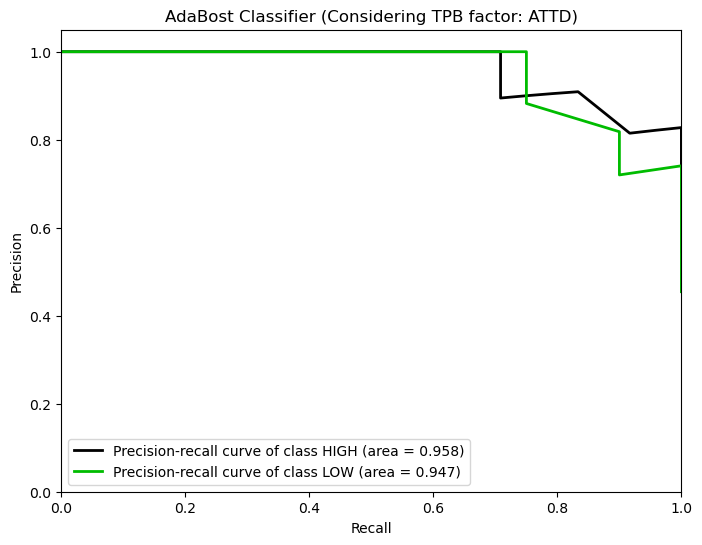

In [44]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "AdaBost Classifier (Considering TPB factor: ATTD)");

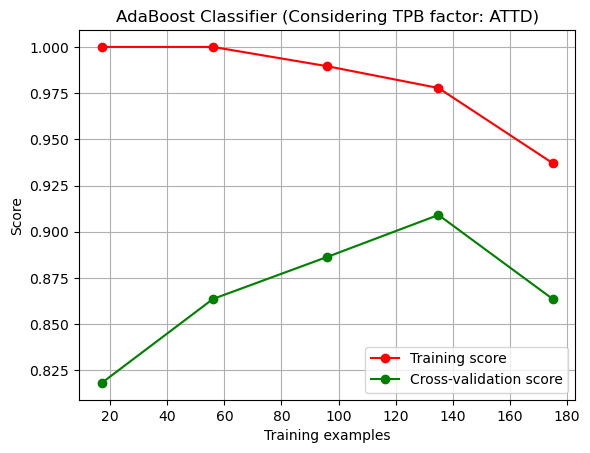

In [45]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(Ada_clf, X, y, cv = cv,title = "AdaBoost Classifier (Considering TPB factor: ATTD)");

#Gradient Boosting Classifier

              precision    recall  f1-score   support

        HIGH       0.91      0.83      0.87        24
         LOW       0.82      0.90      0.86        20

    accuracy                           0.86        44
   macro avg       0.86      0.87      0.86        44
weighted avg       0.87      0.86      0.86        44

Train Accuracy 0.9314285714285714
Test Accuracy 0.8636363636363636


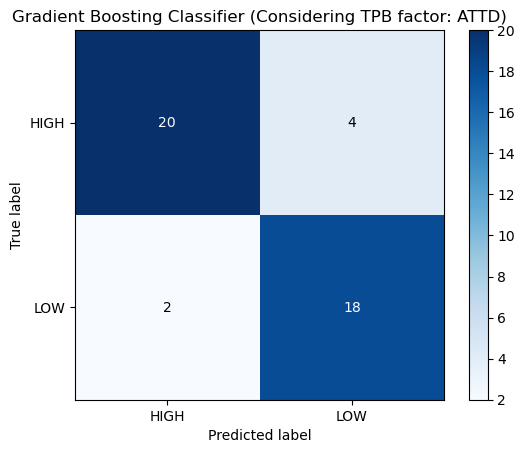

In [46]:
# import xgboost as xgb
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

xgb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

skplt.metrics.plot_confusion_matrix(y_test, y_pred, title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");
print(classification_report(y_test, y_pred))
print("Train Accuracy", accuracy_score(xgb_clf.predict(X_train), y_train))
print("Test Accuracy", accuracy_score(xgb_clf.predict(X_test), y_test))

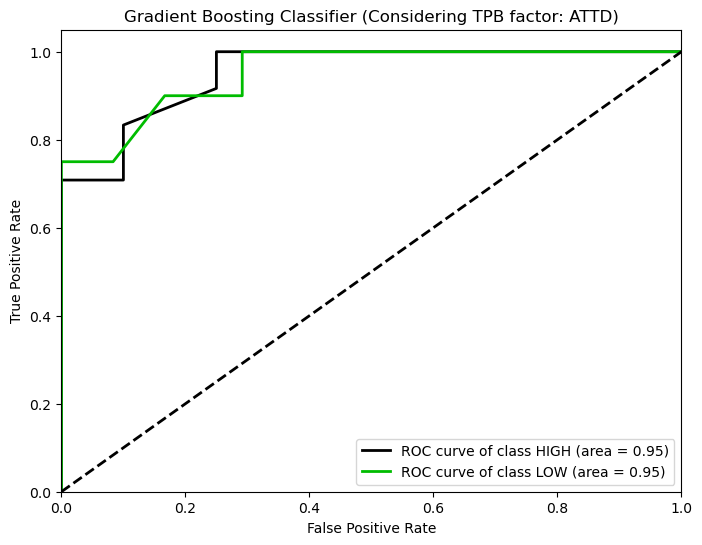

In [47]:
y_probas = xgb_clf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas, figsize = (8,6), plot_micro = False, plot_macro = False,
                      title = "Gradient Boosting Classifier (Considering TPB factor: ATTD)");

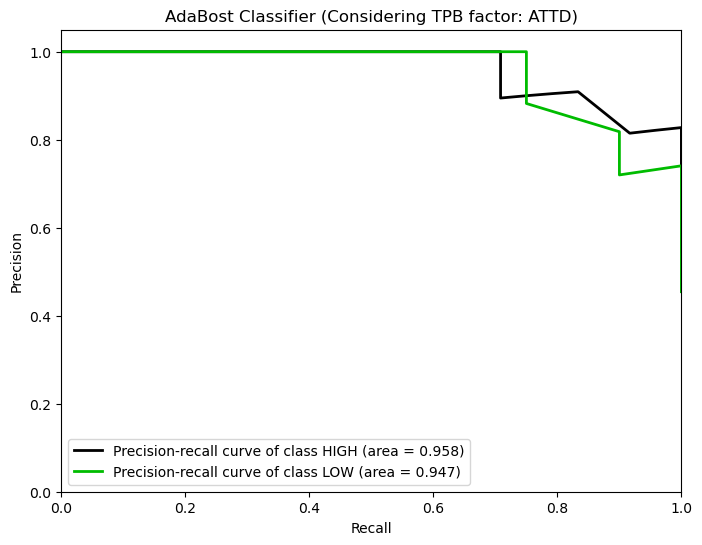

In [48]:
skplt.metrics.plot_precision_recall(y_test, y_probas, figsize = (8,6), plot_micro = False,
                                   title = "AdaBost Classifier (Considering TPB factor: ATTD)");

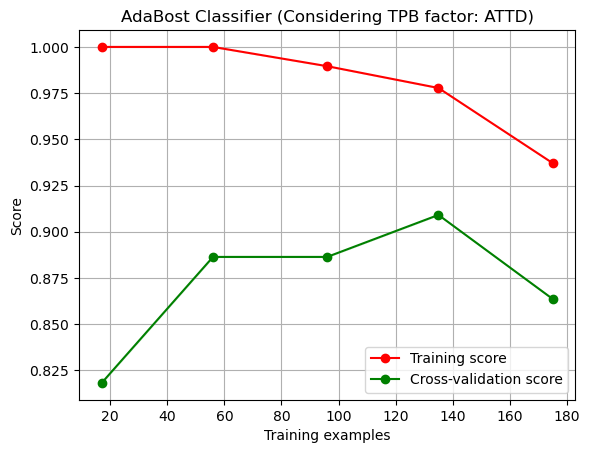

In [49]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=20)
skplt.estimators.plot_learning_curve(xgb_clf, X, y, cv = cv,title = "AdaBost Classifier (Considering TPB factor: ATTD)");